## Analysis Results

**Exchange Rate Changes in 2008:**
   - There were 8 currencies with a positive percentage change and 14 currencies with a negative percentage change when AUD was the base currency.

**Top Performer and Worst Performer:**
   - The AUD-GBP currency pair was the top performer indicating stregth in the AUD against this currency during this period.
   - The AUD-JPY currency pair was the worst performer indicating weakness in the AUD against this currency during this period.

**Major Currencies in the Worst Performers:**
   - JPY, CHF and USD were the Major currencies in the top 5 worst performers, indicating challenges against 3 major currencies during 2008 period.

**Performance of the Australian Dollar in 2023:**
   - The Australian dollar faced a challenging year in 2023 when measured against the USD, which is among the world's top ten strongest currencies. By September 2023, it had reached a low point of 63.58 US cents, marking its lowest level in ten months, following a gradual decline in the preceding months.
   - The global landscape experienced ongoing crises throughout the year, significantly impacting the foreign exchange market. Consequently, the Australian dollar's descent was not unexpected. The Reserve Bank of Australia (RBA) clarifies that Australia employs a floating exchange rate system, where the Australian dollar's value is determined by the interplay of supply and demand in the foreign exchange market.
   - On the domestic front, factors such as interest rates and inflation figures also play a pivotal role in shaping the Australian dollar's performance on the global currency stage. In comparison to the USD, which boasts even higher interest rates and inflation rates than Australia, the AUD has displayed a consistent decline, with sporadic upticks, over the course of the past year.

**How the AUD is performing currently:**
   - There are 22 countries with currencies stronger than AUD and 137 countries with currencies weaker than AUD.
   - Overall, AUD is stronger than 85% of the world's currencies.

In [ ]:
# Dependencies
import requests
import pprint
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import json
import numpy as np

# Load environment variables from .env file
load_dotenv()

# Access the API key
api_key = os.getenv("api_key")

**Impact Analysis on Exchange Rates**
- Objective: To assess how AUD was affected during a specific historical event, in this case, the 2008 financial crisis.

In [2]:
# place the url
url = "https://v6.exchangerate-api.com/v6/"

# Specify the start date
start_date = "2008/1/1"

# Specify the end date
end_date = "2008/12/31"

# Construct the url
response = requests.get(url + api_key + "history/AUD/" + start_date)

# Check the HTTP status code
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code} - {response.text}")


pprint.pprint(response)

{'result': 'success', 'documentation': 'https://www.exchangerate-api.com/docs', 'terms_of_use': 'https://www.exchangerate-api.com/terms', 'year': 2008, 'month': 1, 'day': 1, 'base_code': 'AUD', 'conversion_rates': {'AUD': 1, 'BRL': 1.5613, 'CAD': 0.8672, 'CHF': 0.9942, 'CNY': 6.4017, 'DKK': 4.5002, 'EUR': 0.601, 'GBP': 0.4423, 'HKD': 6.8439, 'INR': 34.5862, 'JPY': 98.0367, 'KRW': 821.2581, 'LKR': 95.3512, 'MXN': 9.5807, 'MYR': 2.9011, 'NOK': 4.7662, 'NZD': 1.143, 'SGD': 1.2602, 'SKW': 821.2581, 'THB': 25.8892, 'TWD': 28.4606, 'USD': 0.8776, 'ZAR': 6.0199}}
<Response [200]>


In [3]:
# Construct the 2nd url
response2 = requests.get(url + api_key + "history/AUD/" + end_date)

pprint.pprint(response2)

<Response [200]>


In [4]:
# Get the data into a JSON format
data1 = response.json()
data2 = response2.json()

# Convert the dictionary to a dataframe
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Make the index a column
df1_reset = df1.reset_index()
df2_reset = df2.reset_index()
# Move the 'index' column to a specific position (8 is the column count)
df1_reset.insert(8, 'QuoteCurrency', df1_reset['index'])
df2_reset.insert(8, 'QuoteCurrency', df2_reset['index'])

# Drop the old 'index' column
df1_clean = df1_reset.drop(columns=['index', 'result', 'documentation', 'terms_of_use'])
df2_clean = df2_reset.drop(columns=['index', 'result', 'documentation', 'terms_of_use'])

# Concatenate DataFrames along rows
combined_df = pd.concat([df1_clean, df2_clean], ignore_index=True)

combined_df.head()

,year,month,day,base_code,QuoteCurrency,conversion_rates
0,2008,1,1,AUD,AUD,1.0000
1,2008,1,1,AUD,BRL,1.5613
2,2008,1,1,AUD,CAD,0.8672
3,2008,1,1,AUD,CHF,0.9942
4,2008,1,1,AUD,CNY,6.4017


In [5]:
# Filter the dataset for the start and end of the year
start_of_year = combined_df[(combined_df['month'] == 1) & (combined_df['day'] == 1)]
end_of_year = combined_df[(combined_df['month'] == 12) & (combined_df['day'] == 31)]

# Merge the start and end of the year datasets on the relevant columns
year_end_analysis = pd.merge(start_of_year, end_of_year, on=['year', 'base_code', 'QuoteCurrency'], suffixes=('_start', '_end'))

# Calculate the percentage change in conversion rates
year_end_analysis['percentage_change'] = ((year_end_analysis['conversion_rates_end'] - year_end_analysis['conversion_rates_start']) / year_end_analysis['conversion_rates_start']) * 100

# Display the year-end analysis per currency pair
year_end_analysis.head()

,year,month_start,day_start,base_code,QuoteCurrency,conversion_rates_start,month_end,day_end,conversion_rates_end,percentage_change
0,2008,1,1,AUD,AUD,1.0000,12,31,1.0000,0.000000
1,2008,1,1,AUD,BRL,1.5613,12,31,1.6152,3.452251
2,2008,1,1,AUD,CAD,0.8672,12,31,0.8547,-1.441421
3,2008,1,1,AUD,CHF,0.9942,12,31,0.7453,-25.035204
4,2008,1,1,AUD,CNY,6.4017,12,31,4.7642,-25.579143


In [6]:
# Calculate mean
mean_percentage_change = round(year_end_analysis['percentage_change'].mean(), 2)

# Calculate median
median_percentage_change = round(year_end_analysis['percentage_change'].median(), 2)

# Calculate mode
mode_percentage_change = year_end_analysis['percentage_change'].mode()[0]
mode_percentage_change = round(mode_percentage_change, 2)

# Calculate standard deviation
std_dev_percentage_change = round(year_end_analysis['percentage_change'].std(), 2)

# Calculate variance
variance_percentage_change = round(year_end_analysis['percentage_change'].var(), 2)

# Calculate the first quartile (Q1)
Q1 = year_end_analysis['percentage_change'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = year_end_analysis['percentage_change'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
IQR = round(IQR, 2)

# Calculate min and max values
min_percentage_change = round(year_end_analysis['percentage_change'].min(), 2)
max_percentage_change = round(year_end_analysis['percentage_change'].max(), 2)

# Print the results
print("Mean:", mean_percentage_change)
print("Median:", median_percentage_change)
print("Mode:", mode_percentage_change)
print("Standard Deviation:", std_dev_percentage_change)
print("Variance:", variance_percentage_change)
print("Interquartile Range (IQR):", IQR)
print("Minimum:", min_percentage_change)
print("Maximum:", max_percentage_change)

Mean: -8.81
Median: -6.35
Mode: 7.31
Standard Deviation: 13.26
Variance: 175.8
Interquartile Range (IQR): 22.81
Minimum: -35.33
Maximum: 8.0


In [7]:
# Calculate lower and upper bounds
lower_bound = round((Q1 - (1.5 * IQR)), 2)
upper_bound = round((Q3 + (1.5 * IQR)), 2)

# Identify outliers
outliers = year_end_analysis[(year_end_analysis['percentage_change'] < lower_bound) | (year_end_analysis['percentage_change'] > upper_bound)]

# Check if any outliers were found
if outliers.empty:
    print("No potential outliers found.")
else:
    print(f"Potential Outliers:\n{outliers}")

print(f"lower bound is: {lower_bound}")
print(f"upper bound is: {upper_bound}")

No potential outliers found.
lower bound is: -54.19
upper bound is: 37.04


In [8]:
# Filter all the currency with positive change
positive_percent_change = year_end_analysis[year_end_analysis['percentage_change'] > 0]
# Sort the list in a descending order
positive_currencies = positive_percent_change.groupby('QuoteCurrency')['percentage_change'].max().sort_values(ascending=False)

positive_currencies

QuoteCurrency
GBP    8.003617
ZAR    7.878868
KRW    7.305438
SKW    7.305438
NZD    5.065617
BRL    3.452251
NOK    2.200915
MXN    0.816224
Name: percentage_change, dtype: float64

In [9]:
# Count the total number of currencies in the list
total_positive_change = len(positive_currencies)

total_positive_change

8

In [10]:
# Filter all the currency with negative change
negative_percent_change = year_end_analysis[year_end_analysis['percentage_change'] < 0]
# Sort the list in an ascending order
negative_currencies = negative_percent_change.groupby('QuoteCurrency')['percentage_change'].min().sort_values(ascending=True)

negative_currencies

QuoteCurrency
JPY   -35.331667
CNY   -25.579143
CHF   -25.035204
HKD   -20.925203
USD   -20.430720
SGD   -20.338042
TWD   -19.621160
LKR   -17.318188
DKK   -16.988134
MYR   -16.959084
EUR   -16.522463
THB    -6.350911
INR    -1.916371
CAD    -1.441421
Name: percentage_change, dtype: float64

In [11]:
# Count the total number of currencies in the list
total_negative_change = len(negative_currencies)

total_negative_change

14

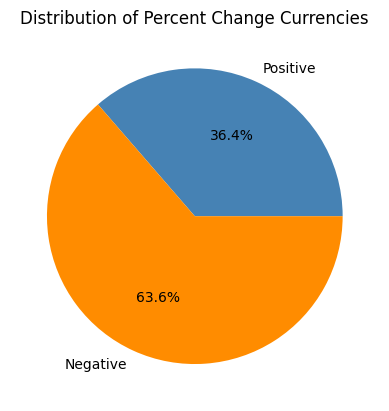

In [12]:
# Data for the pie chart
categories = ['Positive', 'Negative']
counts = [total_positive_change, total_negative_change]

# Colors for the pie chart (steel blue and orange)
colors = ['steelblue', 'darkorange']

# Plotting the pie chart
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors)

# Set plot title
plt.title('Distribution of Percent Change Currencies')

# Display the plot
plt.show()

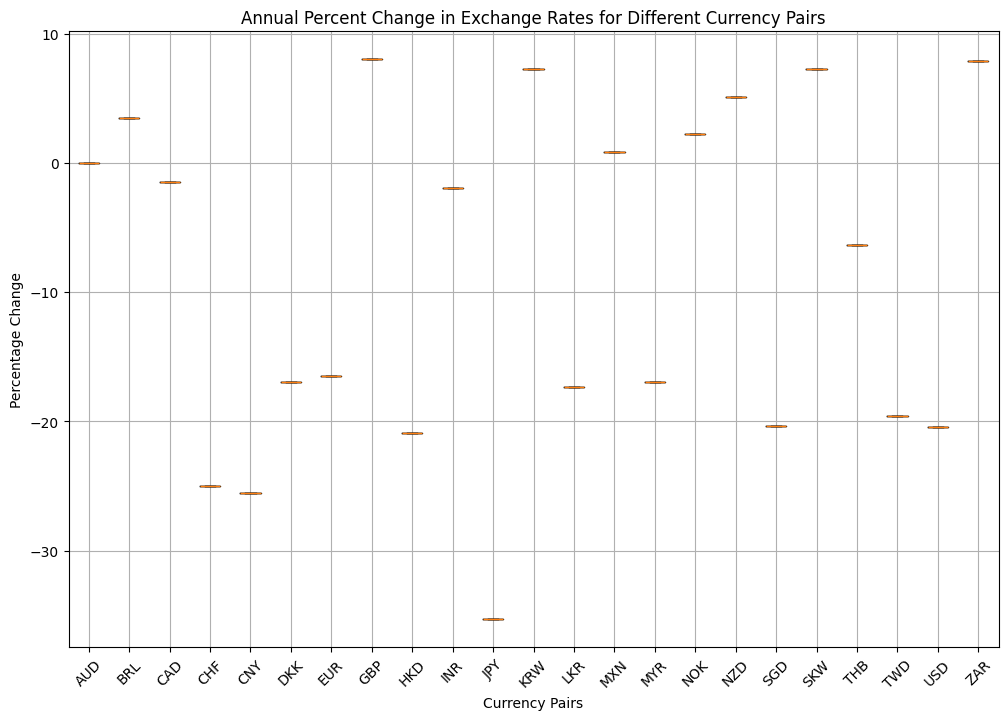

In [13]:
plt.figure(figsize=(12, 8))
plt.boxplot(year_end_analysis['percentage_change'].groupby(year_end_analysis['QuoteCurrency']).apply(list).values, labels=year_end_analysis['QuoteCurrency'].unique())
plt.title('Annual Percent Change in Exchange Rates for Different Currency Pairs')
plt.xlabel('Currency Pairs')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

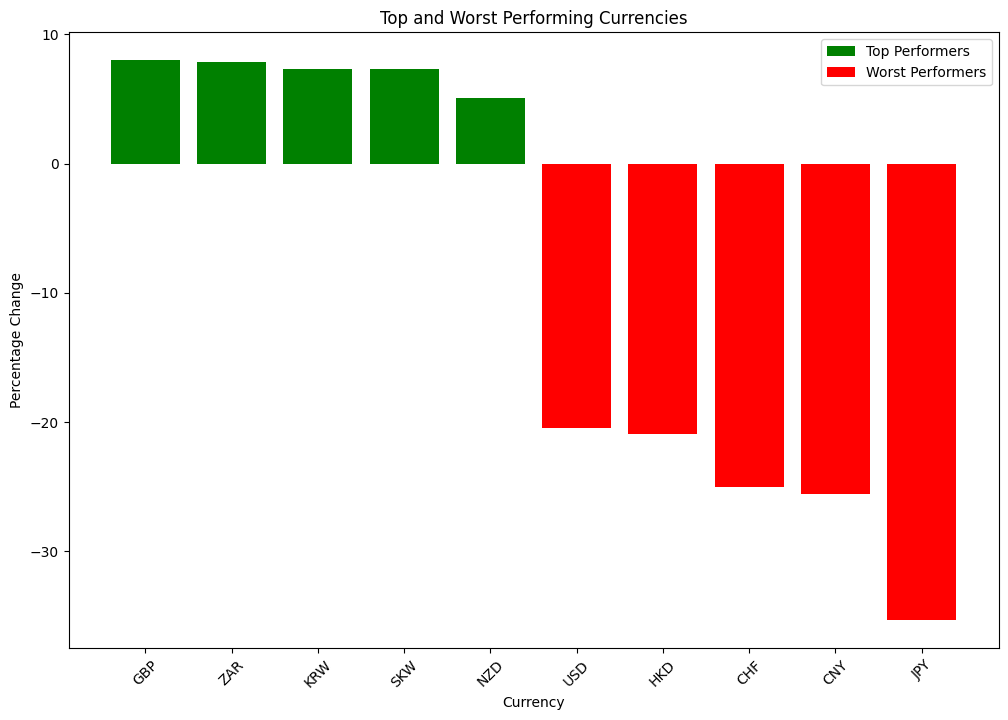

In [14]:
# Select top 5 performing currencies
top_performers = year_end_analysis.nlargest(5, 'percentage_change')  
# Select bottom 5 performing currencies
worst_performers = year_end_analysis.nsmallest(5, 'percentage_change')
# Sort the worst performers in descending order
worst_performers_sorted = worst_performers.sort_values('percentage_change', ascending=False)

plt.figure(figsize=(12, 8))

# Bar chart for top performers
plt.bar(top_performers['QuoteCurrency'], top_performers['percentage_change'], color='green', label='Top Performers')

# Bar chart for worst performers
plt.bar(worst_performers_sorted['QuoteCurrency'], worst_performers_sorted['percentage_change'], color='red', label='Worst Performers')

plt.title('Top and Worst Performing Currencies')
plt.xlabel('Currency')
plt.ylabel('Percentage Change')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**How did AUD exchange rates change perform in 2023?**
- Objective: To track the historical performance of major currency pair, AUD/USD, and understand how their exchange rates have evolved over a specific time frame, in this case January - December 2023.

In [4]:
# Start and end dates for the year 2023
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

# Initialise an empty list to store the data
data_list = []

# Loop through each day of 2023
current_date = start_date
while current_date <= end_date:
    # Format the current date
    formatted_date = current_date.strftime('%Y/%m/%d')
    # URL
    url = f'https://v6.exchangerate-api.com/v6/{api_key}/history/AUD/{formatted_date}'
    
    # Make the API request
    response = requests.get(url)
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        rate = data.get('conversion_rates', {}).get('USD')
        if rate:
            data_list.append({'date': formatted_date, 'rate': rate})
    else:
        print(f"Failed to fetch data for {formatted_date}: {response.status_code}")
    
    # Move to the next day
    current_date += timedelta(days=1)

# Create a DataFrame from the collected data
df = pd.DataFrame(data_list)

# Display the DataFrame
df.head()



,date,rate
0,2023/01/01,0.680616
1,2023/01/02,0.680714
2,2023/01/03,0.676402
3,2023/01/04,0.681486
4,2023/01/05,0.681911


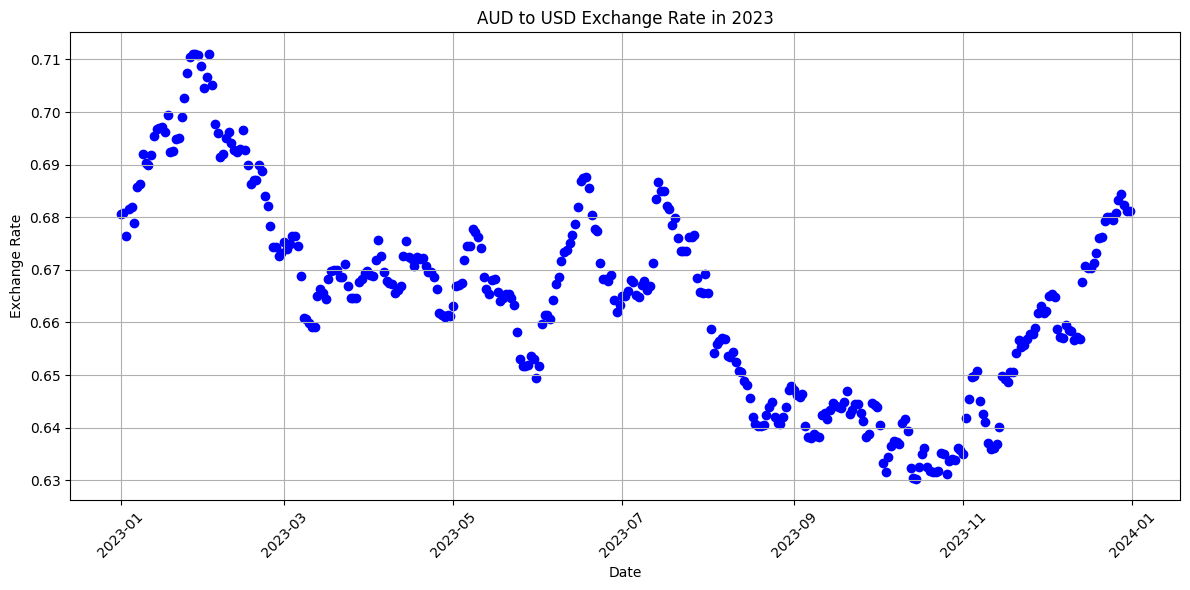

In [5]:
# Convert the 'date' column to datetime format for easier plotting
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index of the DataFrame
df.set_index('date', inplace=True)

# Plotting the exchange rate data
plt.figure(figsize=(12, 6))  
plt.scatter(df.index, df['rate'], color='blue', marker='o')  
plt.title('AUD to USD Exchange Rate in 2023')  
plt.xlabel('Date')  
plt.ylabel('Exchange Rate') 
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  

# Show the plot
plt.show()

# This visualisation will help you see how the exchange rate between the Australian Dollar and the US Dollar fluctuated throughout the year 2023.

In [6]:
# Descriptive Statistics
descriptive_stats = df['rate'].describe()

# Volatility Analysis - Calculating daily returns and their standard deviation
df['daily_return'] = df['rate'].pct_change()
volatility = df['daily_return'].std() * (252**0.5) 

# Create a DataFrame for descriptive statistics
descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Format the values in the DataFrame
descriptive_stats_df = descriptive_stats_df.map("{:.6f}".format)

# Rename the index column
descriptive_stats_df.index.name = 'Statistic'

# Display the DataFrame
print("Descriptive Statistics:")
display(descriptive_stats_df)

# Create a DataFrame for volatility
volatility_df = pd.DataFrame({"Annualised Volatility": [volatility]})

# Format the values in the DataFrame
volatility_df = volatility_df.map("{:.6f}".format)

# Display the DataFrame
print("\nVolatility Analysis:")
display(volatility_df)

#The code prints out the computed annualised volatility. This analysis helps in understanding the volatility of the exchange rate, which is crucial for risk assessment and investment decision-making.

Descriptive Statistics:


,rate
Statistic,
count,365.000000
mean,0.664485
std,0.018779
min,0.630263
25%,0.649246
50%,0.665737
75%,0.676183
max,0.711108



Volatility Analysis:


,Annualised Volatility
0,0.065602


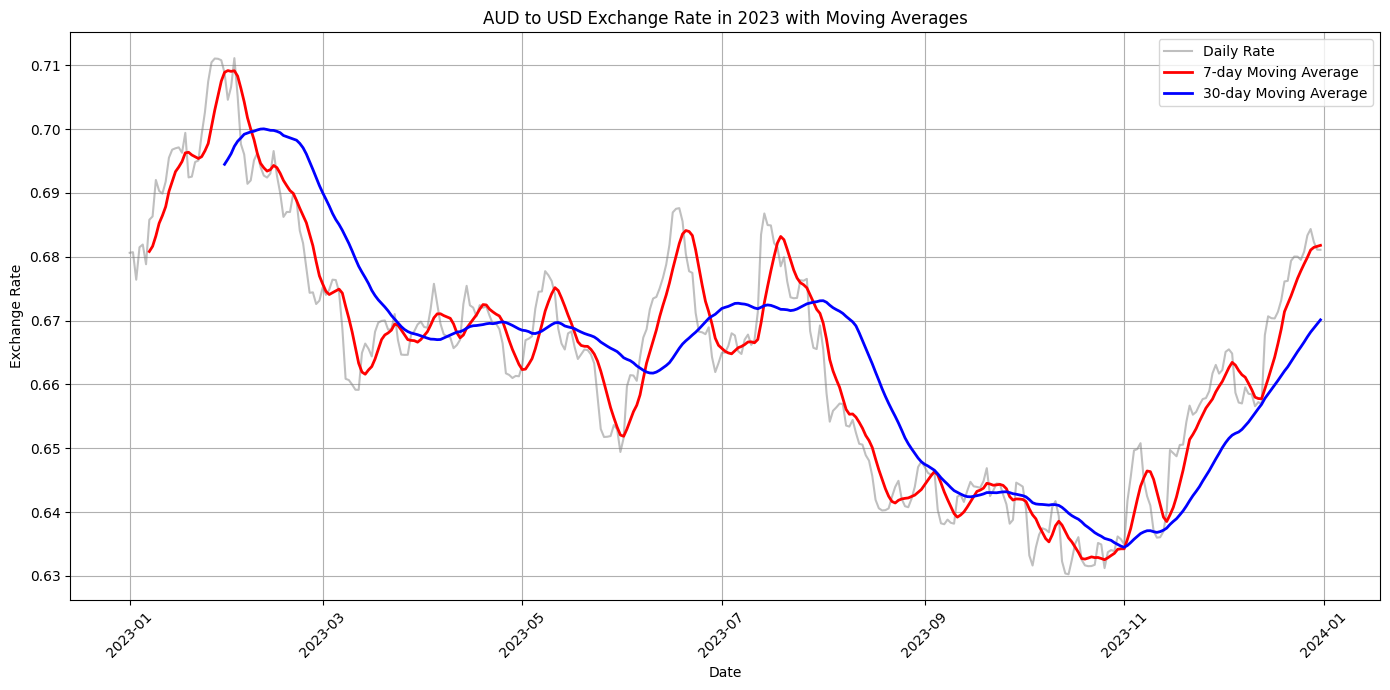

In [7]:
# Calculate a 7-day and 30-day moving average of the exchange rates
df['7-day MA'] = df['rate'].rolling(window=7).mean()
df['30-day MA'] = df['rate'].rolling(window=30).mean()

# Plotting the original exchange rates and the moving averages
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['rate'], label='Daily Rate', alpha=0.5, color='gray')
plt.plot(df.index, df['7-day MA'], label='7-day Moving Average', color='red', linewidth=2)
plt.plot(df.index, df['30-day MA'], label='30-day Moving Average', color='blue', linewidth=2)

plt.title('AUD to USD Exchange Rate in 2023 with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#This example calculates and plots both a 7-day and a 30-day moving average, providing a clearer view of the exchange rate trend by smoothing out daily fluctuations.

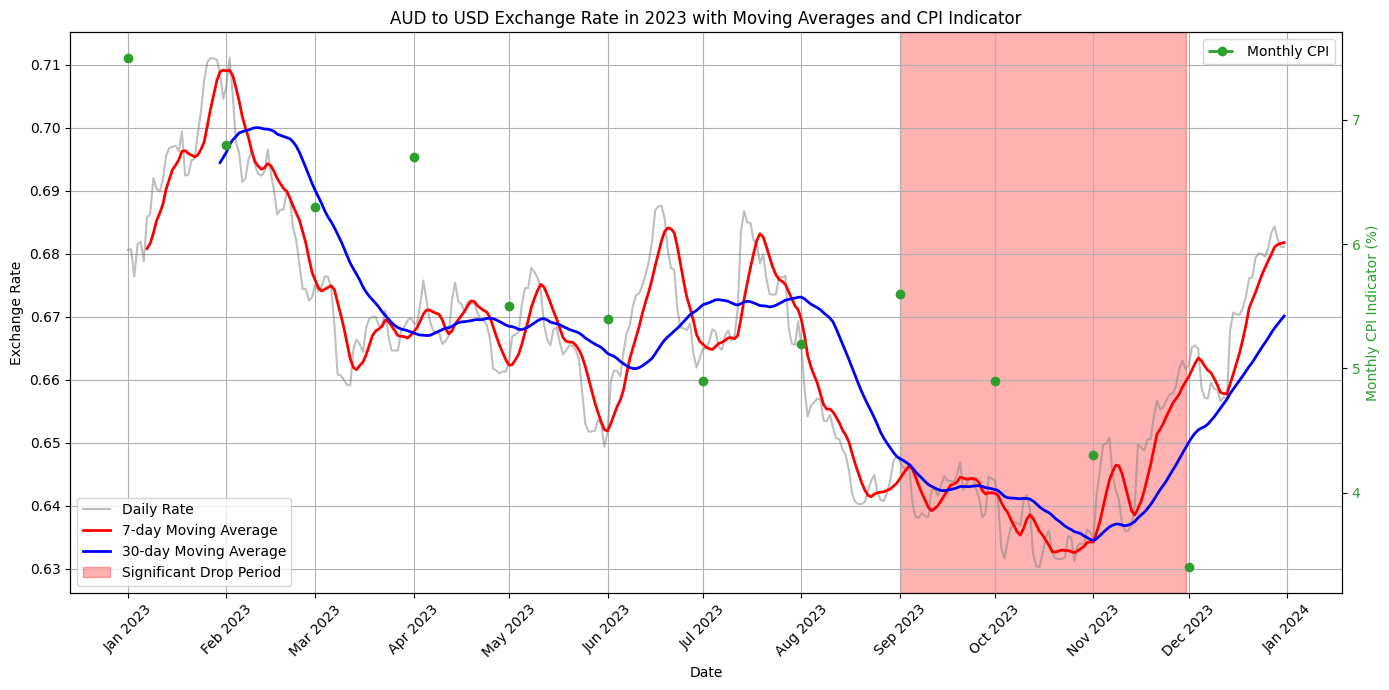

In [8]:
# Load the CPI data from the CSV file
cpi_df = pd.read_csv('Resources/Monthly CPI indicator-Australia-annual-movement.csv')

# Convert the 'Date' column to datetime format
cpi_df['Date'] = pd.to_datetime(cpi_df['Date'], format='%b-%y')

# Set the 'Date' column as the index
cpi_df.set_index('Date', inplace=True)

# Selecting only the 'Monthly CPI indicator (%)' column 
cpi_df = cpi_df[['Monthly CPI indicator (%)']]

# Merge CPI data with exchange rate data
merged_df = df.join(cpi_df, how='left')

# Calculate 7-day and 30-day moving averages of the exchange rates in merged_df
merged_df['7-day MA'] = merged_df['rate'].rolling(window=7).mean()
merged_df['30-day MA'] = merged_df['rate'].rolling(window=30).mean()

# Plotting the exchange rates, moving averages, and CPI data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot daily rates and moving averages
ax1.plot(merged_df.index, merged_df['rate'], label='Daily Rate', alpha=0.5, color='gray')
ax1.plot(merged_df.index, merged_df['7-day MA'], label='7-day Moving Average', color='red', linewidth=2)
ax1.plot(merged_df.index, merged_df['30-day MA'], label='30-day Moving Average', color='blue', linewidth=2)

# Highlighting the period of significant drop
drop_start_date = pd.to_datetime('2023-09-01')
drop_end_date = pd.to_datetime('2023-11-30')
ax1.axvspan(drop_start_date, drop_end_date, color='red', alpha=0.3, label='Significant Drop Period')

# Formatting the plot for exchange rates
ax1.set_title('AUD to USD Exchange Rate in 2023 with Moving Averages and CPI Indicator')
ax1.set_xlabel('Date')
ax1.set_ylabel('Exchange Rate')
ax1.legend(loc='lower left')
ax1.grid(True)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Instantiate a second y-axis for CPI data
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Monthly CPI Indicator (%)', color=color)
ax2.plot(merged_df.index, merged_df['Monthly CPI indicator (%)'], label='Monthly CPI', color=color, marker='o', linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**What are the current strong and weak currencies relative to a base currency?**
- Objective: To determine which currencies are currently performing well (strong) or poorly (weak) when compared to a specific base currency (in this case, the Australian Dollar, AUD).

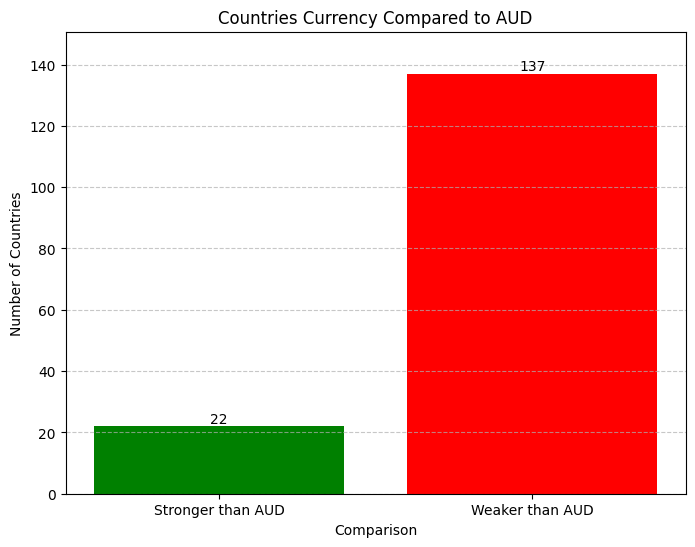

In [12]:
# place the url
url1 = 'https://v6.exchangerate-api.com/v6/'
query_url2 = url1 + api_key + '/latest' + '/AUD'

# Get the data into a JSON format
data2 = requests.get(query_url2).json()

# Convert the dictionary to a dataframe
exchange_rates_df = pd.DataFrame(data2)
exchange_rates_df.head()

# Set a initial value for calculate
stronger_than_aud_count = 0
weaker_than_aud_count = 0

# Loop for calculate sum
for currency, rate in exchange_rates_df['conversion_rates'].items():
    if rate > 1:
        weaker_than_aud_count += 1
    elif rate < 1:
        stronger_than_aud_count += 1

# Make charts
plt.figure(figsize=(8, 6))
bars = plt.bar(['Stronger than AUD', 'Weaker than AUD'], [stronger_than_aud_count, weaker_than_aud_count], color=['green', 'red'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

# Set axis labels and title   
plt.xlabel('Comparison')
plt.ylabel('Number of Countries')
plt.title('Countries Currency Compared to AUD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(stronger_than_aud_count, weaker_than_aud_count) * 1.1)  

plt.show()

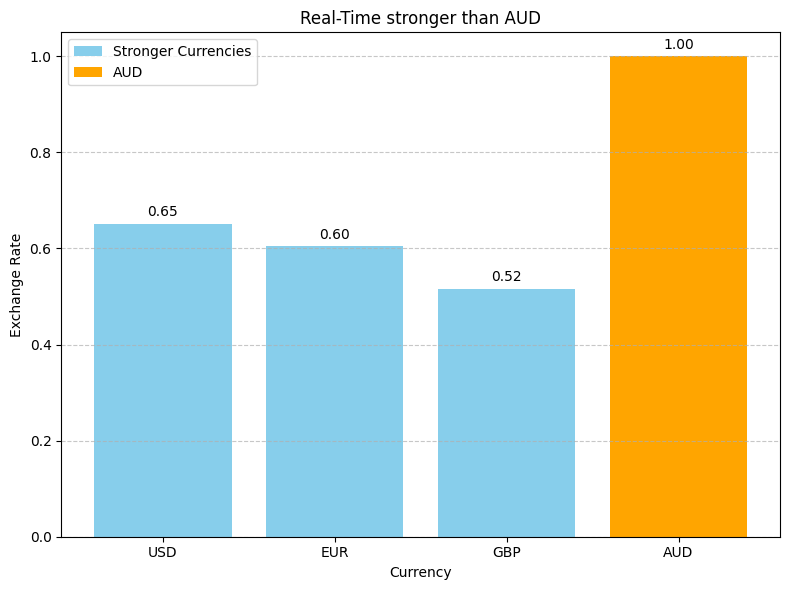

In [13]:
# Add some stronger currencies
base_currency = 'AUD'
specific_currencies = ['USD', 'EUR', 'GBP']

# Make a comprehension dict
exchange_rates = {currency: data2['conversion_rates'][currency] for currency in specific_currencies}

# Extract AUD exchange rate
aud_exchange_rate = data2['conversion_rates'][base_currency]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(specific_currencies, exchange_rates.values(), color='skyblue', label='Stronger Currencies')
aud_bar = plt.bar(base_currency, aud_exchange_rate, color='orange', label='AUD')

# Add annotations on top of each bar
for currency, rate in exchange_rates.items():
    plt.text(currency, rate + 0.01, f'{rate:.2f}', ha='center', va='bottom', fontsize=10)

# Add annotation beside the AUD bar
plt.text(base_currency, aud_exchange_rate + 0.01, f'{aud_exchange_rate:.2f}', ha='center', va='bottom', fontsize=10)

# Set axis labels and title
plt.xlabel('Currency')
plt.ylabel('Exchange Rate')
plt.title('Real-Time stronger than AUD')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

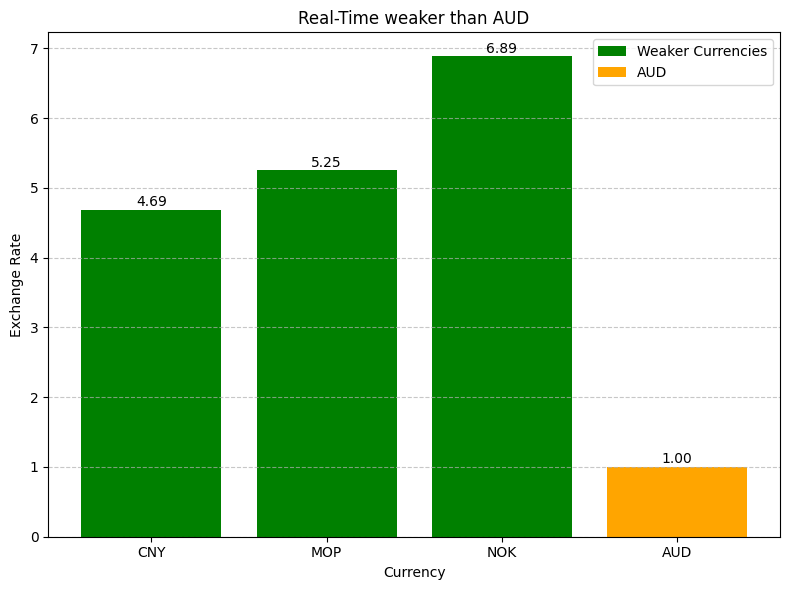

In [14]:
# Add some weaker currencies
weak_currencies = ['CNY', 'MOP', 'NOK'] 
weak_exchange_rates = {currency: data2['conversion_rates'].get(currency, 0) for currency in weak_currencies}

# Plot bar chart for weaker currencies
plt.figure(figsize=(8, 6))
plt.bar(weak_currencies, weak_exchange_rates.values(), color='green', label='Weaker Currencies')

# Plot bar for AUD exchange rate
plt.bar('AUD', aud_exchange_rate, color='orange', label='AUD')

# Add annotations on top of each bar
for currency, rate in weak_exchange_rates.items():
    plt.text(currency, rate + 0.01, f'{rate:.2f}', ha='center', va='bottom', fontsize=10)

# Add annotation beside the AUD bar
plt.text('AUD', aud_exchange_rate + 0.01, f'{aud_exchange_rate:.2f}', ha='center', va='bottom', fontsize=10)

# Set axis labels and title
plt.xlabel('Currency')
plt.ylabel('Exchange Rate')
plt.title('Real-Time weaker than AUD')
# Include AUD as a tick label
plt.xticks(range(len(weak_currencies) + 1), weak_currencies + ['AUD'])  
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
